In [26]:
%matplotlib inline

In [27]:
import damask
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [28]:
result = damask.Result('50_128x128x128_pc_vor_tension.hdf5')
result

Created by b'DAMASK_grid v3.0.0-alpha6'
        on b'2022-06-29 14:08:29+0200'
 executing "b'DAMASK_grid --load tension.yaml --geom 50_128x128x128_pc_vor.vti'"

increment_0 (0.0 s)
  phase
    A
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        IPFcolor_(1 0 0) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (1 0 0)
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        epsilon_V^0.0(F_p) / 1: strain tensor of F_p (plastic deformation gradient)
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


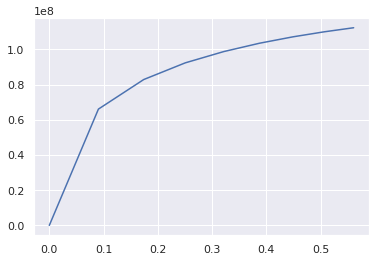

In [29]:
sigma = [np.average(s) for s in result.get('sigma_vM').values()]
epsilon = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
plt.plot(epsilon, sigma)

In [30]:
result = result.view(increments=-1)            # only view last increment
result = result.view(homogenizations=False)    # do not consider homogenization results

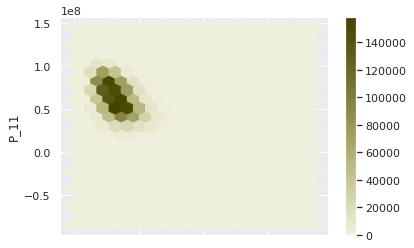

In [35]:
df = pd.DataFrame({'F_11':result.get('F')[:,0,0],
                   'P_11':result.get('P')[:,0,0]})
_ = df.plot.hexbin(x='F_11',y='P_11',gridsize=20, cmap=damask.Colormap.from_predefined('strain'))
